# Dataset
This dataset consists of data of common indicators for school performance as defined by Rutgers, University of Miami, and Albert Shanker Institute from 1993-2021.

Data sources:
* American Community Survey
* Bureau of Economic Analysis
* Education Comparable Wage Index (ECWI)
* National Center for Education Statistics (NCES) F33 District Fiscal Data, reduced
* NCES F33 School District Fiscal Data, full
* NCES Common Core of Data: local education agency (LEA) level
* NCES Common Core of Data: school level (aggregated to LEA level)
* NCES Schools and Staffing Survey
* NCES National Teacher and Principal Survey
* Stanford Education Data Archive (SEDA)
* U.S. Census Bureau Annual Survey of State and Local Finances
* U.S. Census Bureau Small Area Income and Poverty Estimates (SAIPE)
* U.S. Census Bureau Decennial Housing and Income Data
* U.S. Census Bureau Decennial District and County Population Density, 2000/2010

See: https://www.schoolfinancedata.org/wp-content/uploads/2024/01/SID_Codebook_2024.pdf for information about the dataset.

In [15]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

indicatorsDf = pd.read_excel('StateIndicatorsDatabase_2024.xlsx', sheet_name='Data')
costDf = pd.read_excel('DistrictCostDatabase_2024.xlsx', sheet_name='Data')

## Test Score Gap

This first analysis looks at a comparison between average test score gap in standard deviations to poverty quartile. The test score gaps is calculated looking at the difference between test scores in the local area of interest compared to the national average. The poverty quartiles are organized where Q1 is no poverty and Q5 is a lot of poverty.

  Quartile  Average Outcome Gap (Stdev)
0       Q1                     0.278942
1       Q2                     0.102994
2       Q3                     0.000993
3       Q4                    -0.095793
4       Q5                    -0.316285
  Quartile  Median Outcome Gap (Stdev)
0       Q1                    0.270099
1       Q2                    0.098680
2       Q3                   -0.001028
3       Q4                   -0.074827
4       Q5                   -0.298391
  Quartile  Outcome Gap Variance (Stdev)
0       Q1                      0.051566
1       Q2                      0.044835
2       Q3                      0.041656
3       Q4                      0.050780
4       Q5                      0.042772


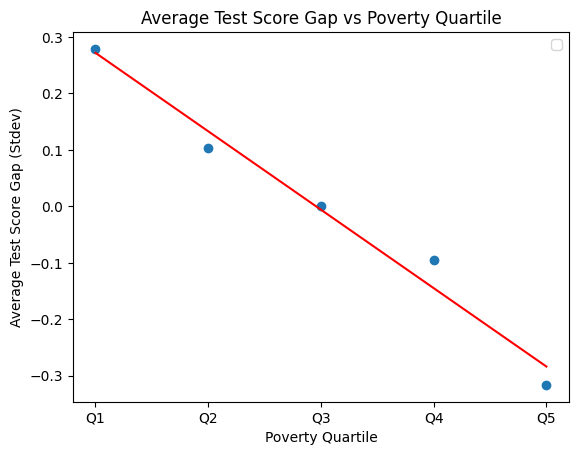

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

outcome_gaps = pd.Series({
    'Q1': indicatorsDf["necm_outcomegap_q1"].mean(),
    'Q2': indicatorsDf["necm_outcomegap_q2"].mean(),
    'Q3': indicatorsDf["necm_outcomegap_q3"].mean(),
    'Q4': indicatorsDf["necm_outcomegap_q4"].mean(),
    'Q5': indicatorsDf["necm_outcomegap_q5"].mean()
})

outcome_gaps_med = pd.Series({
    'Q1': indicatorsDf["necm_outcomegap_q1"].median(),
    'Q2': indicatorsDf["necm_outcomegap_q2"].median(),
    'Q3': indicatorsDf["necm_outcomegap_q3"].median(),
    'Q4': indicatorsDf["necm_outcomegap_q4"].median(),
    'Q5': indicatorsDf["necm_outcomegap_q5"].median()
})

outcome_gaps_var = pd.Series({
    'Q1': indicatorsDf["necm_outcomegap_q1"].var(),
    'Q2': indicatorsDf["necm_outcomegap_q2"].var(),
    'Q3': indicatorsDf["necm_outcomegap_q3"].var(),
    'Q4': indicatorsDf["necm_outcomegap_q4"].var(),
    'Q5': indicatorsDf["necm_outcomegap_q5"].var()
})

outcome_gaps_df = outcome_gaps.reset_index()
outcome_gaps_df.columns = ['Quartile', 'Average Outcome Gap (Stdev)']

outcome_gaps_med_df = outcome_gaps_med.reset_index()
outcome_gaps_med_df.columns = ['Quartile', 'Median Outcome Gap (Stdev)']

outcome_gaps_var_df = outcome_gaps_var.reset_index()
outcome_gaps_var_df.columns = ['Quartile', 'Outcome Gap Variance (Stdev)']

print(outcome_gaps_df)
print(outcome_gaps_med_df)
print(outcome_gaps_var_df)

# Perform linear regression
X = np.array(outcome_gaps_df.index).reshape(-1, 1)
y = outcome_gaps_df['Average Outcome Gap (Stdev)']
model = LinearRegression().fit(X, y)

# Predict values for the line of best fit
y_pred = model.predict(X)

# Plot the data points
plt.scatter(outcome_gaps_df['Quartile'], outcome_gaps_df['Average Outcome Gap (Stdev)'])
plt.plot(outcome_gaps_df['Quartile'], y_pred, color='red')
plt.xlabel('Poverty Quartile')
plt.ylabel('Average Test Score Gap (Stdev)')
plt.title('Average Test Score Gap vs Poverty Quartile')
plt.legend()
plt.show()

## Funding Gap

This second analysis looks at school funding gap vs poverty quartile. School funding gap is the difference between the "required" funding per student as defined by the instituted mentions above and actual measured funding per student. 

  Quartile  Average Funding Gap
0       Q1          3519.559845
1       Q2          1984.573580
2       Q3           657.991169
3       Q4          -840.412586
4       Q5         -6652.681223
  Quartile  Median Funding Gap
0       Q1          2772.08750
1       Q2          1574.02850
2       Q3           371.20050
3       Q4          -923.46315
4       Q5         -5812.83500
  Quartile  Funding Gap Standard Deviations
0       Q1                      4197.197288
1       Q2                      4456.566275
2       Q3                      5105.416072
3       Q4                      5784.999133
4       Q5                      6869.268619
  Quartile  Funding Gap Variance
0       Q1          1.761647e+07
1       Q2          1.986098e+07
2       Q3          2.606527e+07
3       Q4          3.346621e+07
4       Q5          4.718685e+07


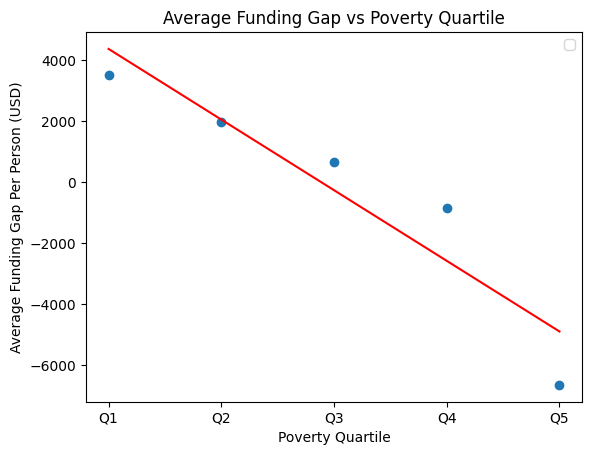

In [17]:
funding_gaps = pd.Series({
    'Q1': indicatorsDf["necm_fundinggap_q1"].mean(),
    'Q2': indicatorsDf["necm_fundinggap_q2"].mean(),
    'Q3': indicatorsDf["necm_fundinggap_q3"].mean(),
    'Q4': indicatorsDf["necm_fundinggap_q4"].mean(),
    'Q5': indicatorsDf["necm_fundinggap_q5"].mean()
})

funding_gaps_med = pd.Series({
    'Q1': indicatorsDf["necm_fundinggap_q1"].median(),
    'Q2': indicatorsDf["necm_fundinggap_q2"].median(),
    'Q3': indicatorsDf["necm_fundinggap_q3"].median(),
    'Q4': indicatorsDf["necm_fundinggap_q4"].median(),
    'Q5': indicatorsDf["necm_fundinggap_q5"].median()
})

funding_gaps_std = pd.Series({
    'Q1': indicatorsDf["necm_fundinggap_q1"].std(),
    'Q2': indicatorsDf["necm_fundinggap_q2"].std(),
    'Q3': indicatorsDf["necm_fundinggap_q3"].std(),
    'Q4': indicatorsDf["necm_fundinggap_q4"].std(),
    'Q5': indicatorsDf["necm_fundinggap_q5"].std()
})

funding_gaps_var = pd.Series({
    'Q1': indicatorsDf["necm_fundinggap_q1"].var(),
    'Q2': indicatorsDf["necm_fundinggap_q2"].var(),
    'Q3': indicatorsDf["necm_fundinggap_q3"].var(),
    'Q4': indicatorsDf["necm_fundinggap_q4"].var(),
    'Q5': indicatorsDf["necm_fundinggap_q5"].var()
})

funding_gaps_df = funding_gaps.reset_index()
funding_gaps_df.columns = ['Quartile', 'Average Funding Gap']

funding_gaps_med_df = funding_gaps_med.reset_index()
funding_gaps_med_df.columns = ['Quartile', 'Median Funding Gap']

funding_gaps_std_df = funding_gaps_std.reset_index()
funding_gaps_std_df.columns = ['Quartile', 'Funding Gap Standard Deviations']

funding_gaps_var_df = funding_gaps_var.reset_index()
funding_gaps_var_df.columns = ['Quartile', 'Funding Gap Variance']

print(funding_gaps_df)
print(funding_gaps_med_df)
print(funding_gaps_std_df)
print(funding_gaps_var_df)

# Perform linear regression
X = np.array(funding_gaps_df.index).reshape(-1, 1)
y = funding_gaps_df['Average Funding Gap']
model = LinearRegression().fit(X, y)

# Predict values for the line of best fit
y_pred = model.predict(X)

# Plot the data points
plt.scatter(funding_gaps_df['Quartile'], funding_gaps_df['Average Funding Gap'])
plt.plot(funding_gaps_df['Quartile'], y_pred, color='red')
plt.xlabel('Poverty Quartile')
plt.ylabel('Average Funding Gap Per Person (USD)')
plt.title('Average Funding Gap vs Poverty Quartile')
plt.legend()
plt.show()

## Correlation

Here we are looking at the correlation between average funding gap and average test score gap.

The correlation coefficient is nearly 1 which means there is a very strong positive correlation between the two.

In [19]:
# Merge the two dataframes on the Quartile column
merged_df = pd.merge(outcome_gaps_df, funding_gaps_df, on='Quartile')

print(merged_df)

correlation = merged_df['Average Funding Gap'].corr(merged_df['Average Outcome Gap (Stdev)'])

print(f'Correlation between Average Funding Gap and Average Funding Gap: {correlation}')

  Quartile  Average Outcome Gap (Stdev)  Average Funding Gap
0       Q1                     0.278942          3519.559845
1       Q2                     0.102994          1984.573580
2       Q3                     0.000993           657.991169
3       Q4                    -0.095793          -840.412586
4       Q5                    -0.316285         -6652.681223
Correlation between Average Funding Gap and Average Funding Gap: 0.9662794063479722


# Teacher Student Ratio

  Poverty Ratio  Predicted Teachers per 100 Students
0            0%                             6.311132
1           10%                             6.444957
2           20%                             6.600800
3           30%                             6.779444


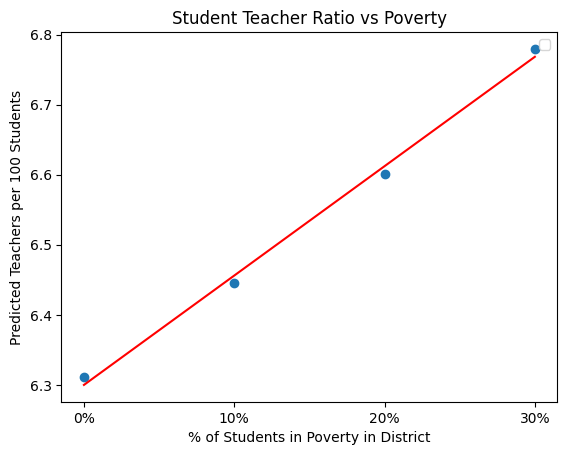

In [20]:
predicted_teacher_ratio = pd.Series({
    '0%': indicatorsDf["predicted_tchph0_"].mean(),
    '10%': indicatorsDf["predicted_tchph10_"].mean(),
    '20%': indicatorsDf["predicted_tchph20_"].mean(),
    '30%': indicatorsDf["predicted_tchph30_"].mean()
})

predicted_teacher_ratio_df = predicted_teacher_ratio.reset_index()
predicted_teacher_ratio_df.columns = ['Poverty Ratio', 'Predicted Teachers per 100 Students']

print(predicted_teacher_ratio_df)

# Perform linear regression
X = np.array(predicted_teacher_ratio_df.index).reshape(-1, 1)
y = predicted_teacher_ratio_df['Predicted Teachers per 100 Students']
model = LinearRegression().fit(X, y)

# Predict values for the line of best fit
y_pred = model.predict(X)

# Plot the data points
plt.scatter(predicted_teacher_ratio_df['Poverty Ratio'], predicted_teacher_ratio_df['Predicted Teachers per 100 Students'])
plt.plot(predicted_teacher_ratio_df['Poverty Ratio'], y_pred, color='red')
plt.xlabel('% of Students in Poverty in District')
plt.ylabel('Predicted Teachers per 100 Students')
plt.title('Student Teacher Ratio vs Poverty')
plt.legend()
plt.show()